In [11]:
import pandas as pd
from tflearn.data_utils import to_categorical


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [278]:
#colnames = ['Status_of_existing_checking_account','Duration_in_month','Credit_history','Purpose','Credit_amount','Savings_account','Present_employment_since',
          # 'Installment_rate_in_percentage_of_disposable_income','Personal_status_and_sex','Other_debtors',
          # 'Present_residence_since','Property','Age_in_years','Other_installment_plans','Housing','Number_of_existing_credits_at_this_bank',
          # 'job','Number_of_people_being_liable_to_provide_maintenance_for','Telephone','foreign_worker','class']

#data = pd.read_csv('german.csv',names = colnames,header = None)

In [485]:
## FOR NUMERIC DATA
colnames = ['C1','C2','C3','C4','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15',
           'C16','C17','C18','C19','C20','C21','C22','C23','C24']
data = pd.read_csv('german.csv',names = colnames,header =None)

/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [440]:
data.head(5)

,C1,C2,C3,C4,C4.1,C5,C6,C7,C8,C9,...,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [43]:
data.Status_of_existing_checking_account = pd.Categorical(data.Status_of_existing_checking_account)
data['Status_of_existing_checking_account'] = data.Status_of_existing_checking_account.cat.codes 

data.Credit_history = pd.Categorical(data.Credit_history)
data['Credit_history'] = data.Credit_history.cat.codes

data.Purpose = pd.Categorical(data.Purpose)
data['Purpose'] = data.Purpose.cat.codes 

data.Credit_amount = pd.Categorical(data.Credit_amount)
data['Credit_amount'] = data.Credit_amount.cat.codes 

data.Savings_account = pd.Categorical(data.Savings_account)
data['Savings_account'] = data.Savings_account.cat.codes 

data.Present_employment_since = pd.Categorical(data.Present_employment_since)
data['Present_employment_since'] = data.Present_employment_since.cat.codes 

data.Personal_status_and_sex = pd.Categorical(data.Personal_status_and_sex)
data['Personal_status_and_sex'] = data.Personal_status_and_sex.cat.codes

data.Other_debtors = pd.Categorical(data.Other_debtors)
data['Other_debtors'] = data.Other_debtors.cat.codes 

data.Property = pd.Categorical(data.Property)
data['Property'] = data.Property.cat.codes

data.Other_installment_plans = pd.Categorical(data.Other_installment_plans)
data['Other_installment_plans'] = data.Other_installment_plans.cat.codes 

data.Housing = pd.Categorical(data.Housing)
data['Housing'] = data.Housing.cat.codes 

data.job = pd.Categorical(data.job)
data['job'] = data.job.cat.codes 

data.Telephone = pd.Categorical(data.Telephone)
data['Telephone'] = data.Telephone.cat.codes 

data.foreign_worker = pd.Categorical(data.foreign_worker)
data['foreign_worker'] = data.foreign_worker.cat.codes 

In [286]:
data.head(8)

,C1,C2,C3,C4,C4.1,C5,C6,C7,C8,C9,...,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
5,4,36,2,91,5,3,3,4,4,35,...,0,0,1,0,0,0,0,1,0,1
6,4,24,2,28,3,5,3,4,2,53,...,0,0,1,0,0,1,0,0,1,1
7,2,36,2,69,1,3,3,2,3,35,...,0,1,1,0,1,0,0,0,0,1


## SCALING AND PCA

In [376]:
from sklearn.decomposition import pca
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [377]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]



In [378]:
X.head(5)

,C1,C2,C3,C4,C4.1,C5,C6,C7,C8,C9,...,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23
0,1,6,4,12,5,5,3,4,1,67,...,1,0,0,1,0,0,1,0,0,1
1,2,48,2,60,1,3,2,2,1,22,...,1,0,0,1,0,0,1,0,0,1
2,4,12,4,21,1,4,3,3,1,49,...,1,0,0,1,0,0,1,0,1,0
3,1,42,2,79,1,4,3,4,2,45,...,1,0,0,0,0,0,0,0,0,1
4,1,24,3,49,1,3,3,4,4,53,...,1,1,0,1,0,0,0,0,0,1


In [292]:
X_Scaled = StandardScaler().fit_transform(X)

In [293]:
X_Scaled

array([[-1.25456565, -1.23647786,  1.34401408, ..., -0.14998296,
        -0.5       ,  0.76635604],
       [-0.45902624,  2.24819436, -0.50342796, ..., -0.14998296,
        -0.5       ,  0.76635604],
       [ 1.13205258, -0.73866754,  1.34401408, ..., -0.14998296,
         2.        , -1.30487651],
       ...,
       [ 1.13205258, -0.73866754, -0.50342796, ..., -0.14998296,
        -0.5       ,  0.76635604],
       [-1.25456565,  1.9992892 , -0.50342796, ..., -0.14998296,
        -0.5       ,  0.76635604],
       [-0.45902624,  1.9992892 ,  1.34401408, ..., -0.14998296,
        -0.5       ,  0.76635604]])

In [294]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_Scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [295]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.009408,-2.855138
1,0.268967,0.976399
2,-2.181028,-1.932150
3,1.503838,1.347953
4,1.233466,-0.310291


In [297]:
finalDf = pd.concat([principalDf, data[['C24']]], axis = 1)


In [298]:

finalDf.head(5)

,principal component 1,principal component 2,C24
0,0.009408,-2.855138,1
1,0.268967,0.976399,2
2,-2.181028,-1.932150,1
3,1.503838,1.347953,1
4,1.233466,-0.310291,2


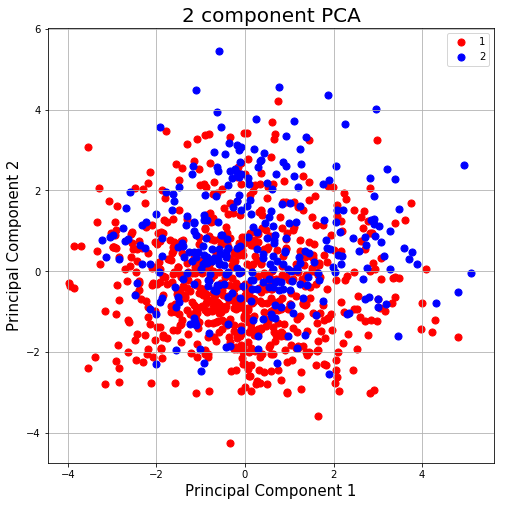

In [299]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['C24'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Variance Ratio

In [300]:
pca.explained_variance_ratio_

array([0.10492874, 0.08839484])

## KMEANS

In [468]:
x = principalDf.iloc[:,[0,1]].values
#x_kmeans = data


#columns = colnames = ['C1','C2','C4.1','C4','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15',
           #'C16','C17','C18','C19','C20','C21','C22','C23','C24']
#x_kmeans.drop(columns, inplace=True, axis=1)

In [470]:
x

array([[ 0.00940753, -2.85513756],
       [ 0.26896727,  0.97639879],
       [-2.18102769, -1.93214977],
       ...,
       [-0.20623324, -0.82298565],
       [ 2.21374792,  1.51805258],
       [ 1.85310888,  0.23599538]])

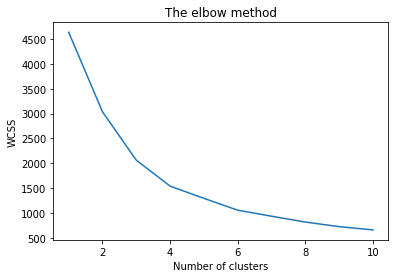

In [471]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, n_init = 10, init = 'k-means++', max_iter = 300, random_state = 0)
    kmeans.fit(principalComponents)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [472]:
kmeans = KMeans(n_clusters = 4,n_init = 10, max_iter = 300, init = 'k-means++',random_state = 0)
y_kmeans = kmeans.fit_predict(principalComponents)
y_kmeans

array([0, 2, 1, 3, 3, 3, 0, 3, 1, 1, 2, 2, 2, 0, 2, 1, 0, 3, 3, 0, 0, 2,
       1, 0, 1, 1, 1, 2, 1, 3, 0, 2, 0, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 3,
       3, 1, 0, 2, 1, 2, 1, 3, 1, 0, 3, 1, 0, 0, 1, 2, 1, 0, 3, 3, 0, 0,
       1, 1, 3, 0, 3, 0, 0, 1, 3, 0, 2, 0, 3, 2, 0, 0, 2, 1, 1, 1, 1, 3,
       0, 1, 0, 0, 1, 2, 0, 3, 0, 0, 0, 3, 1, 2, 1, 2, 3, 3, 0, 1, 2, 0,
       0, 2, 2, 0, 1, 0, 3, 2, 0, 0, 1, 3, 2, 0, 2, 1, 1, 1, 0, 1, 3, 3,
       1, 0, 3, 0, 3, 1, 0, 2, 1, 2, 2, 2, 0, 3, 0, 0, 2, 0, 0, 1, 2, 3,
       3, 2, 1, 1, 0, 1, 0, 1, 0, 3, 0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 1, 3,
       2, 0, 2, 0, 3, 0, 1, 0, 0, 1, 3, 0, 1, 3, 0, 2, 0, 2, 2, 0, 0, 2,
       3, 0, 0, 1, 0, 2, 1, 3, 0, 1, 2, 0, 0, 0, 3, 0, 0, 1, 2, 0, 2, 0,
       1, 2, 1, 0, 3, 0, 3, 3, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1,
       3, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 3, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 3, 3, 0, 2, 1, 0, 0, 1, 2, 3, 1, 0, 0, 0, 2,
       3, 3, 1, 1, 1, 3, 3, 3, 0, 3, 2, 1, 0, 0, 1,

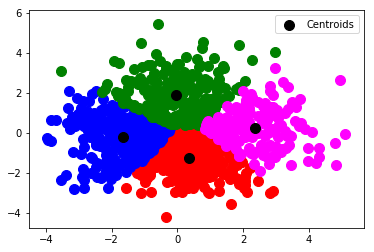

In [473]:
plt.scatter(principalComponents[y_kmeans == 0, 0], principalComponents[y_kmeans == 0, 1], s = 100, c = 'red', label = '')
plt.scatter(principalComponents[y_kmeans == 1, 0], principalComponents[y_kmeans == 1, 1], s = 100, c = 'blue', label = '')
plt.scatter(principalComponents[y_kmeans == 2, 0], principalComponents[y_kmeans == 2, 1], s = 100, c = 'green', label = '')
plt.scatter(principalComponents[y_kmeans == 3, 0], principalComponents[y_kmeans == 3, 1], s = 100, c = 'magenta', label = '')
#plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'yellow', label = '')
#plt.scatter(x[y_kmeans == 5, 0], x[y_kmeans == 5, 1], s = 100, c = 'purple', label = '')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [482]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score
score = metrics.silhouette_score(x, y_kmeans)
score


0.3414034865455017

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


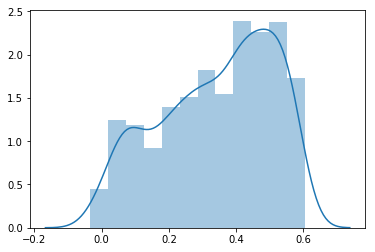

In [483]:
scores = metrics.silhouette_samples(x, y_kmeans)
sns.distplot(scores);

In [475]:
score = adjusted_rand_score(Y, y_kmeans)
score

0.03433248377751772

## Kmeans - Split test and train

In [308]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
X_train,X_test,y_train,y_test = train_test_split(principalComponents, Y, test_size = 0.20, random_state=500)
X_train = normalize(X_train)
X_test = normalize(X_test)

In [309]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


In [310]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(X_train)
kmeans_predicted_train_labels = kmeans.predict(X_train)

In [311]:
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#tn,fp,fn,tp=confusion_matrix(y_train,kmeans_predicted_train_labels).ravel()
#flag=False
#if tn+tp<fn+fp:
  #  flag=True
kmeans_predicted_test_labels=kmeans.predict(X_test)
#if flag:
   # kmeans_predicted_test_labels=1-kmeans_predicted_test_labels

#tn,fp,fn,tp=confusion_matrix(y_test,kmeans_predicted_test_labels).ravel()

kmeans_accuracy_score = accuracy_score(y_test,kmeans_predicted_test_labels)

print("")
print("K-Means")
#print("Confusion Matrix")
#print("trueNegatives =",tn,"falsePositives =",fp)
#print("falseNegatives =",fn,"truePositives =",tp)
print("Accuracy -->",kmeans_accuracy_score)


K-Means
Accuracy --> 0.355


## GMM

In [476]:
from sklearn.mixture import GaussianMixture



gmm = GaussianMixture(n_components=4)
gmm.fit(x)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(x)
y_cluster_gmm

array([1, 2, 0, 3, 1, 3, 1, 3, 0, 1, 2, 2, 1, 1, 2, 0, 1, 3, 3, 1, 1, 2,
       0, 1, 0, 0, 0, 2, 0, 3, 1, 2, 1, 1, 0, 1, 3, 0, 1, 0, 1, 1, 1, 3,
       3, 1, 1, 2, 0, 0, 0, 3, 1, 1, 3, 0, 1, 1, 1, 2, 0, 1, 3, 3, 1, 1,
       1, 0, 3, 1, 3, 1, 1, 1, 3, 3, 2, 1, 3, 2, 1, 1, 2, 0, 0, 0, 0, 3,
       1, 0, 1, 1, 0, 2, 1, 3, 1, 1, 1, 3, 0, 2, 0, 2, 3, 3, 1, 1, 2, 1,
       1, 2, 2, 1, 0, 1, 3, 2, 1, 1, 1, 3, 0, 1, 2, 0, 0, 0, 1, 0, 3, 3,
       0, 1, 3, 1, 3, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3,
       3, 2, 0, 0, 1, 0, 1, 0, 1, 3, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 0, 3,
       0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 3, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       3, 1, 1, 0, 1, 2, 0, 3, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 1, 3, 1, 3, 3, 1, 2, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0,
       3, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 3, 0, 0, 1, 3, 1,
       0, 1, 1, 1, 1, 1, 0, 3, 3, 1, 2, 0, 1, 1, 1, 2, 3, 0, 1, 1, 1, 2,
       3, 3, 1, 1, 0, 3, 3, 3, 1, 3, 3, 0, 1, 1, 0,

In [477]:
import matplotlib as mpl
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(5-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of German Dataset");


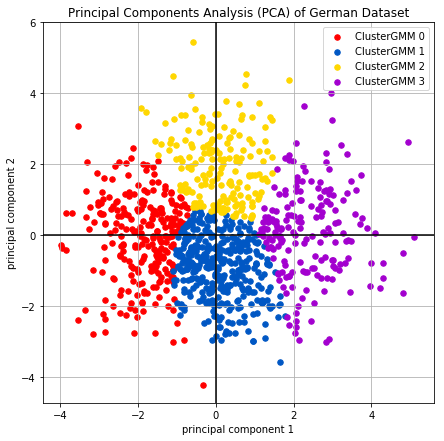

In [478]:
df_plot = principalDf.copy()
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [462]:
score = adjusted_rand_score(Y, y_cluster_gmm)
score

0.011294637648076146

## AIC/BIC

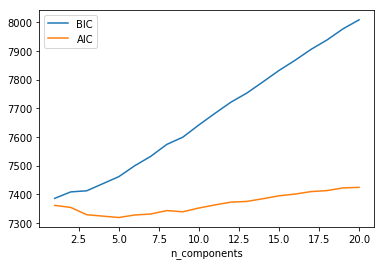

In [479]:
import numpy as np
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(x)
          for n in n_components]

plt.plot(n_components, [m.bic(x) for m in models], label='BIC')
plt.plot(n_components, [m.aic(x) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

## Comparison using silhoutte score

In [342]:
from  sklearn.metrics import silhouette_score
labels = gmm.fit(x).predict(x)
n_clusters=n_components
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(x)
silhouette_avg = silhouette_score(x, labels,metric='euclidean')
print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

gmm = GaussianMixture(n_components=4).fit(x)
labels = gmm.predict(x)
silhouette_avg = silhouette_score(x, labels,metric='euclidean')
print("For n_components =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] The average silhouette_score is : 0.33411992551168657
For n_components = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] The average silhouette_score is : 0.3332059373608039


## Linear Regression

In [425]:
from sklearn.linear_model import LinearRegression, Ridge

In [500]:
X_lr = data[['C2','C10']]
Y_lr = data['C4']
Y_lr

0       12
1       60
2       21
3       79
4       49
5       91
6       28
7       69
8       31
9       52
10      13
11      43
12      16
13      12
14      14
15      13
16      24
17      81
18     126
19      34
20      21
21      26
22      22
23      18
24      21
25      14
26       4
27       4
28      24
29      68
      ... 
970     15
971     74
972     12
973     73
974     28
975     13
976      8
977     24
978     25
979     13
980     84
981     48
982     29
983     82
984     20
985     14
986     63
987     14
988     66
989     17
990     36
991     16
992     19
993     40
994     24
995     17
996     39
997      8
998     18
999     46
Name: C4, Length: 1000, dtype: int64

In [501]:


X_train,X_test,y_train,y_test = train_test_split(X_lr, Y_lr, test_size = 0.20, random_state=500)
#X_train = normalize(X_train)
#X_test = normalize(X_test)

lRegressor = LinearRegression()
lRegressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [502]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(800, 2)
(200, 2)
(800,)
(200,)


In [503]:
pred_1 = lRegressor.predict(X_test)

In [504]:
pred_1

array([16.68091441, 28.4197311 , 15.92352418, 90.0485187 , 33.53174921,
       55.5420305 , 19.61561859, 10.81150607, 19.61561859, 37.22384362,
       37.22384362, 15.21356233, 37.22384362, 37.22384362, 37.22384362,
       24.01767484, 15.21356233, 32.82178736, 54.83206864, 46.02795613,
       19.61561859,  7.8768019 , 19.61561859, 28.4197311 , 59.2341249 ,
       54.83206864, 19.61561859, 19.61561859, 24.01767484, 28.4197311 ,
       10.81150607, 46.02795613, 33.17676828, 54.83206864, 72.7952746 ,
       37.57882454, 54.83206864, 29.12969295, 73.15025553, 16.68091441,
       19.61561859, 19.61561859, 32.82178736, 10.81150607, 37.93380547,
       46.02795613, 24.01767484, 37.22384362, 54.83206864, 37.22384362,
       37.22384362, 16.68091441, 15.21356233, 20.32558044, 37.22384362,
       37.93380547, 37.22384362, 28.4197311 , 19.61561859, 28.4197311 ,
       37.22384362, 73.15025553, 19.61561859, 37.22384362, 28.4197311 ,
       54.83206864, 19.61561859, 15.21356233, 46.02795613, 37.22

In [505]:
print("R^2 score for Linear Regression: ", lRegressor.score(X_test, y_test))

R^2 score for Linear Regression:  0.3993475888961797


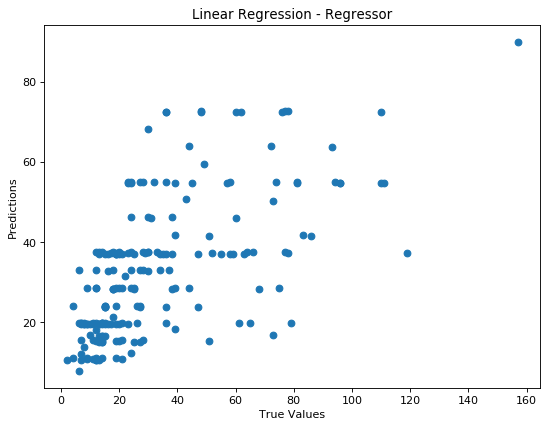

In [499]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(y_test,pred_1)
#plt.scatter(X_train, y_train)
#plt.plot(X_test, pred_1, c='r')
plt.title("Linear Regression - Regressor")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


In [325]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: ', lRegressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred_1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred_1))

Coefficients:  [-0.49500223  0.33290216 -0.26702689  0.05323651 -0.26802684 -0.15722586
 -0.08079369 -0.00605706  0.06994788 -0.03922787 -0.19086526  0.08095682
 -0.03919488 -0.0509062  -0.20528497  0.22791051 -0.18331482  0.31188549
  0.42917986 -0.02311789 -0.15921999 -0.09405609 -0.05500542 -0.03782928]
Mean squared error: 0.16
Variance score: 0.25


## Linear Regression - Purpose VS Good/Bad

In [408]:

X_linear_full = data
Y_linear = data['C24']

In [409]:
columns = colnames = ['C1','C2','C3','C4.1','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15',
           'C16','C17','C18','C19','C20','C21','C22','C23']
X_linear_full.drop(columns, inplace=True, axis=1)



In [410]:
y = X_linear_full.iloc[:, -1].values
X = X_linear_full.iloc[:, :-1].values

In [413]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X, y, test_size = 0.2)
print(X_train_linear.shape)
print(X_test_linear.shape)
print(y_train_linear.shape)
print(y_test_linear.shape)

(800, 1)
(200, 1)
(800,)
(200,)


In [414]:

lRegressor = LinearRegression()
lRegressor.fit(X_train_linear, y_train_linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [415]:
pred_1 = lRegressor.predict(X_test_linear)

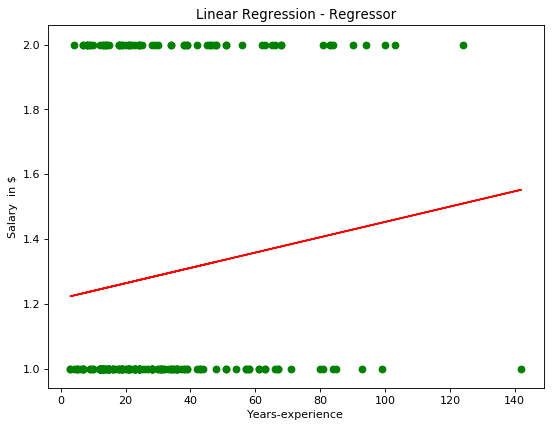

In [418]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X_test_linear, y_test_linear, c='g')
#plt.scatter(X_train, y_train)
plt.plot(X_test_linear, pred_1, c='r')
plt.title("Linear Regression - Regressor")
plt.xlabel("Years-experience")
plt.ylabel("Salary  in $")
plt.show()

In [423]:
X_test_linear.dtype

dtype('int64')

[7.14248671 1.12930053]


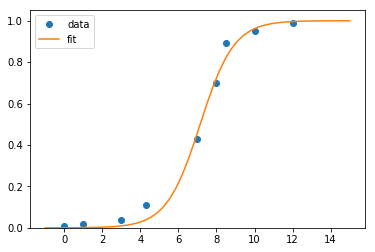

In [420]:
from scipy.optimize import curve_fit

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

xdata = np.array([0.0,   1.0,  3.0, 4.3, 7.0,   8.0,   8.5, 10.0, 12.0])
ydata = np.array([0.01, 0.02, 0.04, 0.11, 0.43,  0.7, 0.89, 0.95, 0.99])
#ydata = dis_x
#xdata = np.array([dis_y])

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print (popt)

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x,y, label='fit')
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.show()

## Logistic Regression

In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [332]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [333]:
y_pred = regressor.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1])

## Predicting the accuracy score

In [334]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.805

In [346]:
from sklearn.metrics import precision_recall_fscore_support as score


precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.80606061 0.8       ]
recall: [0.95       0.46666667]
fscore: [0.87213115 0.58947368]
support: [140  60]


## Decision Trees

In [347]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image, display
from subprocess import call
import pydotplus
import collections

In [348]:
clf = tree.DecisionTreeClassifier()

In [349]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [350]:
dot_data = tree.export_graphviz(clf, out_file=None,class_names=['Good', 'Bad'],filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)


colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('german_credit.png')

True

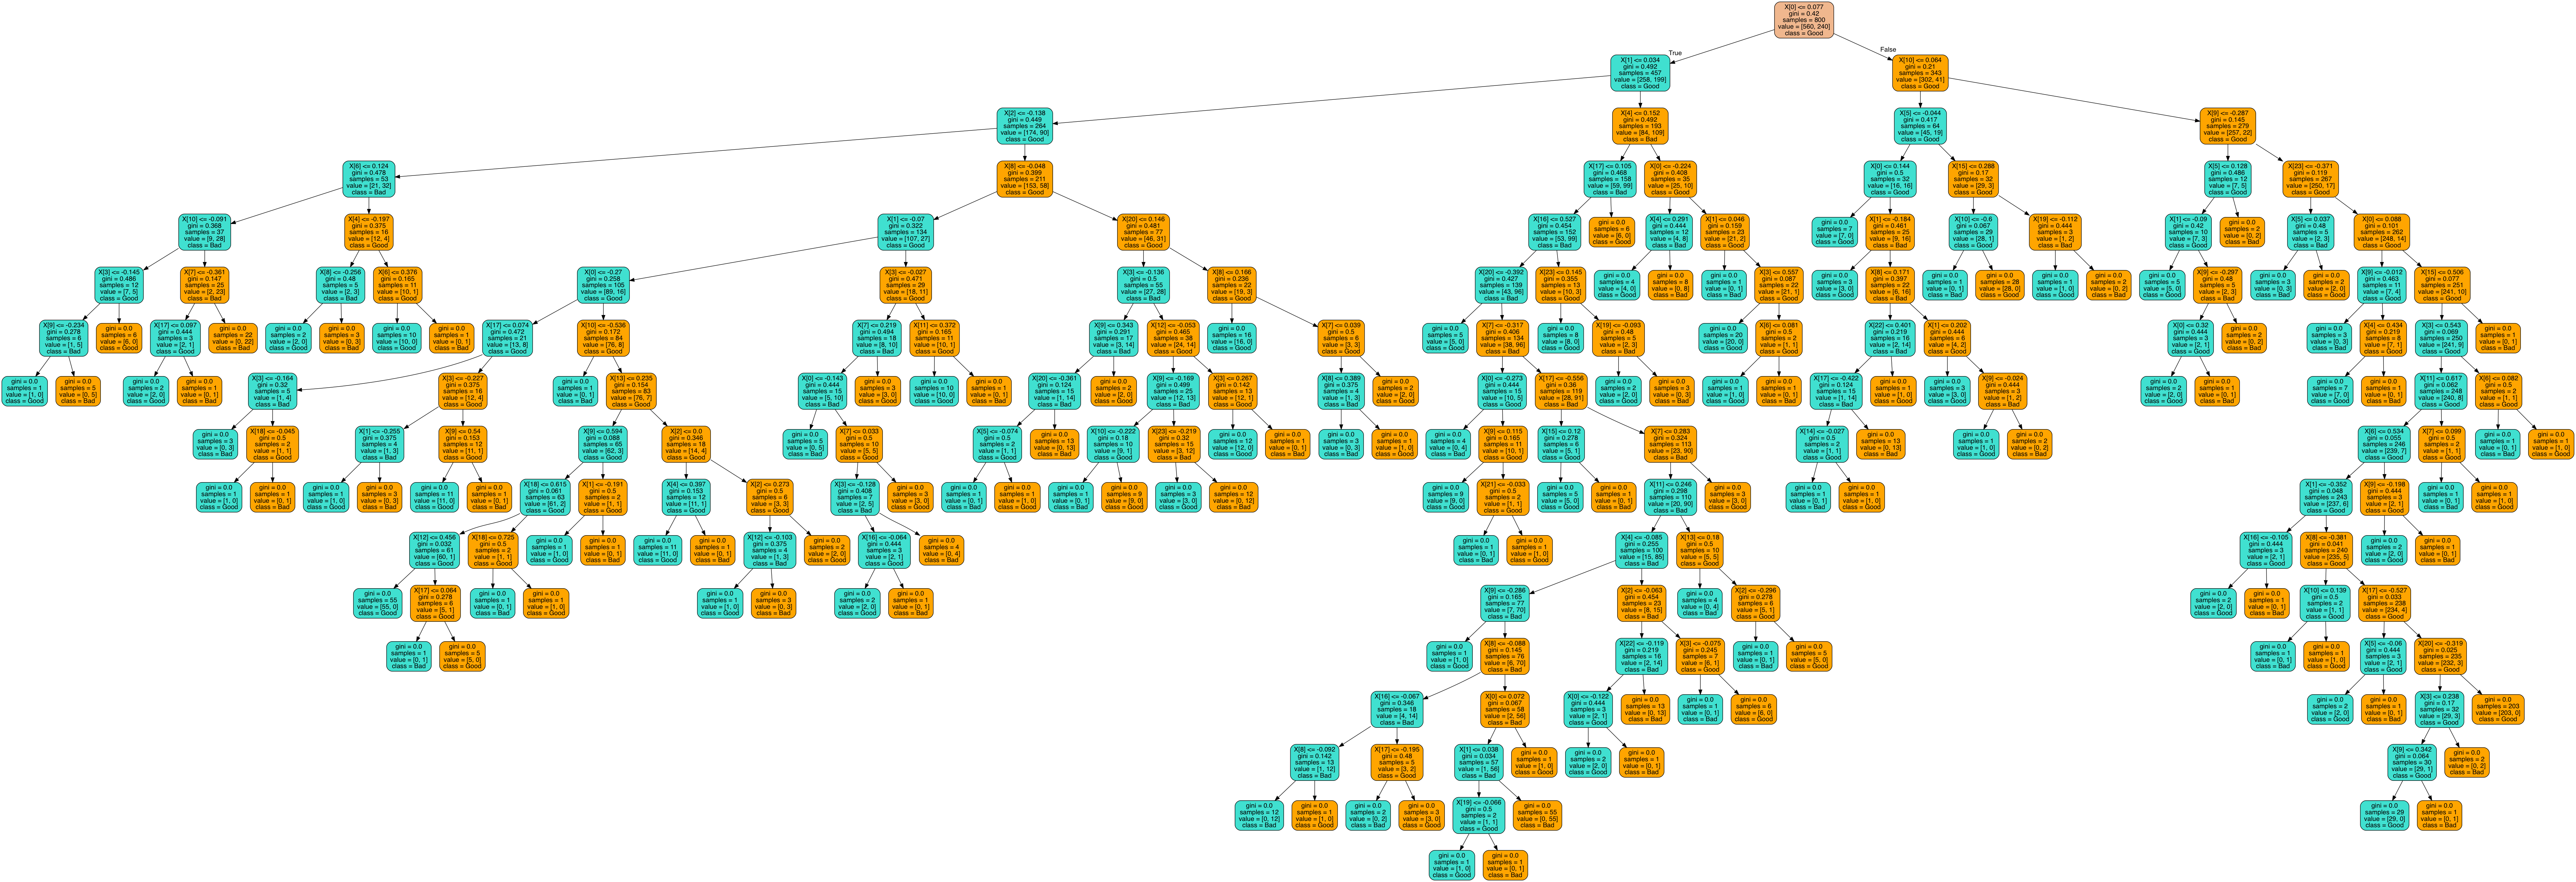

In [351]:
from IPython.display import Image
PATH = !pwd
Image(filename = PATH[0] + "/german_credit.png")

In [359]:
prediction = clf.predict(X_test)
print(prediction)

[2 1 1 2 1 2 1 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 2 2
 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 2 2
 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 1 2 2 1 1 2 2 1 2 2 2 2 1 1 1 2 1
 2 2 2 2 1 1 1 1 1 1 2 1 2 2 2 1 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 1 2 1 2 1 2 1 2 2 2 1 1 1 1 1 2 1 1 2 2
 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1]


In [362]:

acc_decision_tree = round(clf.score(X_test, y_test) * 100, 2)
acc_decision_tree

61.5

In [363]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

             precision    recall  f1-score   support

          1       0.74      0.69      0.72       140
          2       0.38      0.43      0.40        60

avg / total       0.63      0.61      0.62       200

[[97 43]
 [34 26]]


## Random Forests

In [364]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.755
